## Projeto de Análise e Ciência de Dados com Machine Learning

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Copetina.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos

Bem-vindo(a)!!! Meu nome é Enzo Schitini, sou cientista de dados e fiz algumas pesquisas sobre os dados do SINASC no estado de Rondônia (BR) no ano de 2019. O meu objetivo é realizar uma análise aprofundada do tema, encontrar padrões nos dados e conectar à realidade. Definitivamente um dos projetos em que mais me esforcei para obter bons resultados, espero que você, assim como eu, ache interessante.

**Data Science** Portfólio | *27 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

Vamos explorar os dados do *Sistema de Informação sobre Nascidos Vivos (SINASC)* relativos aos recém-nascidos nascidos no estado de Rondônia, Brasil, no ano de 2019. Assim que a análise exploratória for concluída, prosseguiremos para `identificar insights` e avaliar a saúde pública no estado. 

Usaremos `abordagens estatísticas e analíticas para identificar correlações`, padrões e associações entre variáveis, além disso vamos criar um `Modelo de Machine Learning` para fazer inferências de dados faltantes. 

#### Os pilares da análise:

- Descobrir os fatores que influenciam a saúde dos bebês.
- Entender melhor as raças e o nível educacional das mães.
- Analisaremos as menores de idade, meninas que constroem família antes dos 18 anos.
- O que nos diz a escolha do parto entre cesariana ou parto vaginal?
- E finalmente melhor compreender a população do estado de Rondônia no Brasil em 2019 e construir a um pouco do que seria o 'Rosto da população'.

*Além disso, exploraremos o impacto das variáveis ​​sociorraciais nas condições de nascimento e nos indivíduos*

#### - *Contexto dos Dados do SINASC em Rondônia - 2019*

O Sistema de Informação sobre Nascidos Vivos (SINASC) é uma base de dados administrada pelo Ministério da Saúde do Brasil, que tem como objetivo coletar e disponibilizar informações detalhadas sobre todos os nascimentos ocorridos no país. No âmbito do estado de Rondônia, o SINASC fornece dados abrangentes e específicos sobre os nascimentos ocorridos no ano de 2019, sendo uma fonte crucial para análises de saúde pública, planejamento e avaliação de políticas sociais.

#### - *Origem dos Dados*

Os dados utilizados neste projeto foram extraídos do portal do governo, mais precisamente do Departamento de Informática do SUS (DATASUS). Essa instituição é responsável pela coleta, armazenamento e divulgação das informações de saúde no Brasil, garantindo a integridade e a precisão dos dados disponibilizados.

O conjunto de dados pode ser encontrado no site do governo brasileiro e segue políticas de privacidade, o que significa que não há nomes de pessoas ou qualquer coisa que nos permita saber quem são os indivíduos.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/fonte.png" alt="capa" width="310">


> Os dados foram fornecidos pelo [DATASUS](https://datasus.saude.gov.br/)

#### - *Metodologia*

A análise será conduzida utilizando técnicas estatísticas e de visualização de dados para identificar padrões e anomalias. Será empregado o Python como ferramentas de manipulação e análise dos dados, na limpeza e preparação dos dados para garantir a qualidade das análises e do modelo de Machine Learning.

#### - *Importância do Projeto*

A análise dos dados do SINASC para Rondônia em 2019 é vital para entender melhor as condições de nascimento e saúde materno-infantil no estado. As informações derivadas desse estudo podem auxiliar gestores públicos, pesquisadores e profissionais de saúde na tomada de decisões informadas, visando a melhoria contínua dos serviços de saúde e o bem-estar da população.

Ao fornecer uma visão detalhada sobre os nascimentos, este projeto contribui para um entendimento mais profundo das dinâmicas de saúde e demografia de Rondônia, promovendo ações mais eficazes e direcionadas no campo da saúde pública.

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação o ambiente de desenvolvimento</li>
  <li>Estrutura e tratamento dos dados e colunas</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>✨ Insights ✨</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

## Preparação o ambiente de desenvolvimento

### Ultils

In [107]:
%%writefile main.py

import pandas as pd

class GuidaDataframe:
    def __init__(self, data_frame):
        self.data_frame = data_frame

    def esplorazione(self):
        righe, qnt_colonne = self.data_frame.shape
        quantita_righe = format(righe, ",").replace(',', '.')
        sequenza = list(range(qnt_colonne + 1))
        sequenza = sequenza[1:]

        colonne = self.data_frame.columns.to_list()
        types_list = [str(type(self.data_frame[col][0])).split("'")[1] for col in self.data_frame.columns]
        lista_categorias = [self.data_frame[col].nunique() for col in self.data_frame.columns]

        elementos_nulos = self.data_frame.isnull().sum()
        elementos_nulos = elementos_nulos.to_list()

        memoria = (self.data_frame.memory_usage(deep=True) / (1024 ** 2)).round() # Mb
        lista_memoria = memoria.to_list()
        lista_memoria = lista_memoria[1:]

        memoria = self.data_frame.memory_usage(deep=True) # Total Mb
        memoria_total = round(memoria.sum() / (1024 ** 2), 2)

        percentagem_dados_nulos = round((self.data_frame.isnull().sum() / righe) * 100)
        percentagem_dados_nulos = percentagem_dados_nulos.to_list()

        dados = pd.DataFrame({'Nome': colonne, 
                             'Tipo': types_list, 
                             'qnt_categorias': lista_categorias,
                             'Dados nulos' : elementos_nulos,
                             'Dados nulos %' : percentagem_dados_nulos,
                             'Memória (Mb)': lista_memoria}, index=sequenza)
        
        # Títulos
        print('Tabela Exploratória')
        print(f'Nesses dados temos {quantita_righe} linhas e {qnt_colonne} colunas.')
        print(f'Consumo de memória: {memoria_total}Mb.')
        
        return dados

Overwriting main.py


In [108]:
%%writefile machine_learning.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

class MLM(object):
    def __init__(self) -> None:
        pass

    def Machine_Learning(self, dataframe):

        def desempenho(arvore, teste_x, teste_y):
            from sklearn.metrics import precision_score
            predictions = arvore.predict(teste_x)
            accuracy = accuracy_score(teste_y, predictions)
            precision_score_value = precision_score(teste_y, predictions)
            recall_score_value = recall_score(teste_y,predictions)
            
            print("Accuracy:", (accuracy * 100).round(), "%")
            print('\nConfusion Matrix:')
            print(confusion_matrix(teste_y,predictions))
            print("\nRecall Score:", (recall_score_value * 100).round(), "%")
            print('\nPrecision Score Value', (precision_score_value * 100).round(), "%")

        PAIS = dataframe[dataframe['IDADEPAI'] != 0]
        PAIS = PAIS.drop_duplicates()

        def default(row):
            if (row['IDADEMAE'] <= 18) & (row['IDADEPAI'] > 18):
                return 1
            else:
                return 0

        PAIS['default'] = PAIS.apply(default, axis=1)
        PAIS = PAIS[['IDADEMAE', 'PESO', 'default']]

        df = PAIS
        df = pd.get_dummies(df)

        y = df['default']
        X = df.drop('default', axis=1)

        clf_df = DecisionTreeClassifier(random_state=100)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

        clf_df.fit(X_train, y_train)

        #y.value_counts().plot.pie(autopct='%.2f');

        rus = RandomUnderSampler(random_state=42)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        X_train, y_train = rus.fit_resample(X_train, y_train)

        y_train.value_counts().plot.pie(autopct='%.2f');

        clf = DecisionTreeClassifier(random_state=100)
        path = clf.cost_complexity_pruning_path(X_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities

        clf_df4 = DecisionTreeClassifier(ccp_alpha=0.001359, random_state=100) # 0.001359
        clf_df4.fit(X_train, y_train)

        plt.figure(figsize=(25, 10))
        plot_tree(clf_df4,
                filled=True,
                feature_names=X_train.columns);

        predictions = clf_df4.predict(X_test)

        count_0 = np.count_nonzero(predictions == 0)
        count_1 = np.count_nonzero(predictions == 1)

        proportion_0 = count_0 / len(predictions)
        proportion_1 = count_1 / len(predictions)

        print("Proporção de 0:", proportion_0)
        print("Proporção de 1:", proportion_1)

        desempenho(clf_df4, X_test, y_test)
        print(classification_report(y_test, predictions, target_names=['0', '1']))

        feature_names = X.columns

        feature_importance = pd.DataFrame(clf_df4.feature_importances_, index = feature_names).sort_values(0, ascending=False)
        features = list(feature_importance[feature_importance[0]>0].index)

        with open('clf_model.pkl', 'wb') as model_file:
            pickle.dump(clf_df4, model_file)

        print("Modello salvato correttamente in 'clf_model.pkl'")

        with open('clf_model.pkl', 'rb') as model_file:
            loaded_model = pickle.load(model_file)

        Sinasc = dataframe
        Sinasc_Ml = Sinasc[['IDADEMAE', 'PESO']]
        Sinasc_Ml.head()

        new_predictions = loaded_model.predict(Sinasc_Ml)
        Sinasc_Ml['Target'] = new_predictions
        pd.DataFrame(Sinasc_Ml)

        predictions = Sinasc_Ml['Target']
        predictions.to_csv('predictions.csv')

Overwriting machine_learning.py


### Importando os pacotes

In [109]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import calendar
import missingno as msno

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from main import GuidaDataframe
from machine_learning import MLM
pd.set_option('display.max_columns', None)

### Carregando os Datasets

In [110]:
df = pd.read_csv('Data\SINASC_RO_2019.csv')
IDH = pd.read_csv('Data\idh.csv')
PIB = pd.read_csv('Data\pib.csv')

- `Informações sobre os data sets:`

| Data Frame  | Descrição |
| ------- | --------- |
| df | Conjunto de dados do SINASC |
| IDH | Conjunto de dados com informações sobre o IDH em cada município |
| PIB | Conjunto de dados com informações sobre o PIB em cada município |

## Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

**Quando perguntaram a `Albert Einstein` o que ele faria se tivesse uma hora para resolver um problema:**

<img src="./image/Frase.png" alt="capa" width="800">

#### *Isso nos faz entender bem a importância das perguntas que nos fazemos, portanto, em vez de irmos imediatamente aos insights, vamos começar a fazer uma análise exploratória*

#### *...então vamos...*

## Estrutura e tratamento dos dados e colunas

Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos, a porcentagem deles e etc.

#### Mostrando o DataFrame

In [111]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


### Remover duplicados

In [112]:
df.drop_duplicates(inplace=True)

### Estrutura das colunas

- Selecionando as colunas

In [113]:
columns = [
       # Em uso
       'ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 
       'CONSPRENAT', 'MESPRENAT', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       
       # 
       'SEMAGESTAC', 'CODANOMAL', 'DIFDATA', 'DTRECEBIM', 'VERSAOSIST', 'NUMEROLOTE', 'CODMUNRES',
       'CODOCUPMAE', 'CODMUNNASC', 'CODESTAB', 'TPMETESTIM', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR']

In [114]:
df = df[['ORIGEM', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
    'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 
    'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 
    'DTCADASTRO', 'DTRECORIGA', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 
    'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT', 
    'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']]

Agora vamos ver com mais detalhes como é a estrutura das colunas usando a função `esplorazione()` do pacote `main.py`

In [115]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
Tabela_Exploratoria

Tabela Exploratória
Nesses dados temos 27.028 linhas e 38 colunas.
Consumo de memória: 27.68Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,ORIGEM,numpy.int64,1,0,0.0,0.0
2,LOCNASC,numpy.int64,4,0,0.0,0.0
3,IDADEMAE,numpy.int64,40,0,0.0,0.0
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
9,GRAVIDEZ,str,3,79,0.0,2.0
10,PARTO,str,2,49,0.0,2.0


### Dados faltantes

In [116]:
# GRAVIDEZ PARTO HORANASC SEXO APGAR1 APGAR5 DTNASCMAE 
# munResLat munResLon munResAlt munResArea

<Axes: >

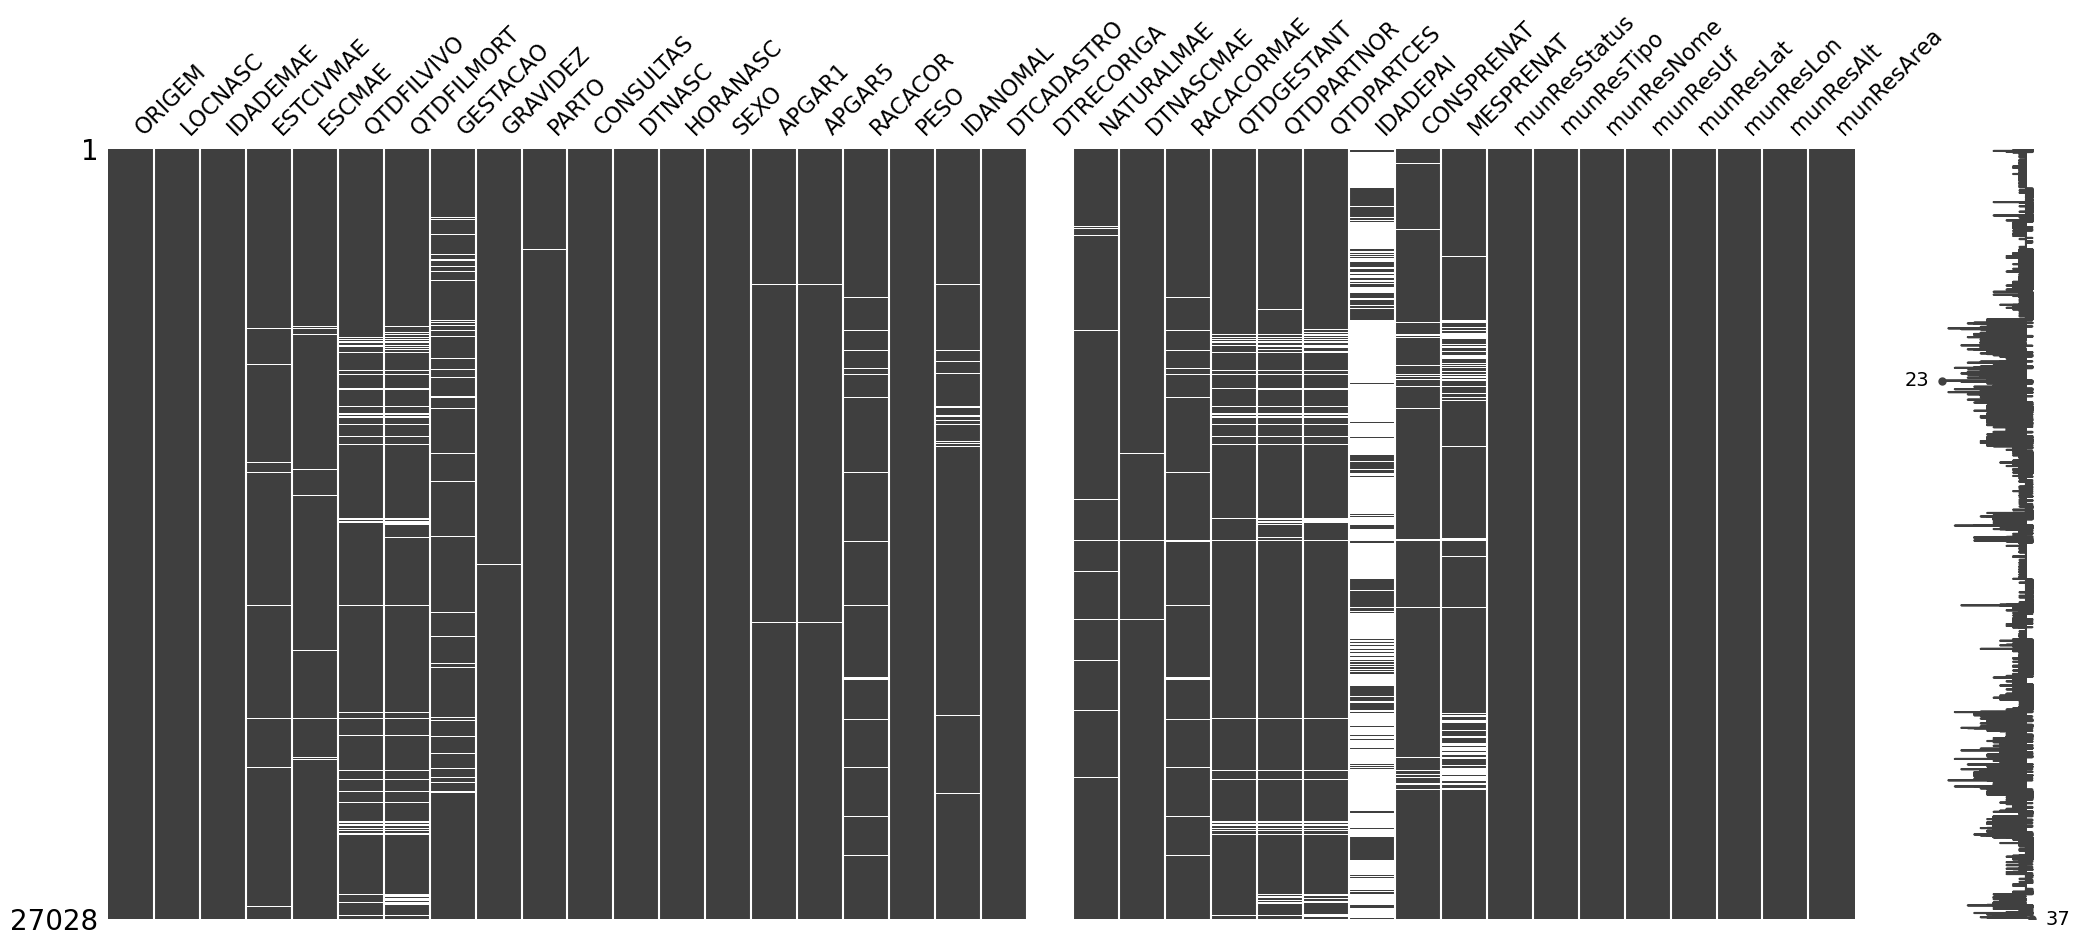

In [117]:
msno.matrix(df)

Entre os conjuntos de dados que possuem dados nulos estão: 

In [118]:
Tabela_Exploratoria[Tabela_Exploratoria['Dados nulos %'] > 0.0]

,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
4,ESTCIVMAE,numpy.float64,6,317,1.0,0.0
5,ESCMAE,str,5,312,1.0,2.0
6,QTDFILVIVO,numpy.float64,15,1573,6.0,0.0
7,QTDFILMORT,numpy.float64,11,2098,8.0,0.0
8,GESTACAO,str,6,1232,5.0,2.0
17,RACACOR,str,5,647,2.0,2.0
19,IDANOMAL,numpy.float64,3,591,2.0,0.0
21,DTRECORIGA,numpy.float64,0,27028,100.0,0.0
22,NATURALMAE,numpy.float64,27,298,1.0,0.0
24,RACACORMAE,numpy.float64,5,661,2.0,0.0


#### *Agora vamos analisar os dados nulos do Data Frame*

- **`DTRECORIGA`** ->  Vamos apagar pois 100% dos dados são nulos

In [119]:
df.drop(columns='DTRECORIGA', axis=1, inplace=True)

- Quanto às demais colunas, excluímos apenas as linhas nulas, pois são poucas

In [120]:
df.dropna(subset=['ESTCIVMAE'], inplace=True)
df.dropna(subset=['ESCMAE'], inplace=True)
df.dropna(subset=['RACACOR'], inplace=True)
df.dropna(subset=['IDANOMAL'], inplace=True)
df.dropna(subset=['NATURALMAE'], inplace=True)
df.dropna(subset=['RACACORMAE'], inplace=True)
df.dropna(subset=['CONSPRENAT'], inplace=True)

In [121]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
nulos = Tabela_Exploratoria[['Nome', 'Dados nulos']][(Tabela_Exploratoria['Dados nulos'] > 0) & (Tabela_Exploratoria['Dados nulos'] <= 2098)]
nulos

Tabela Exploratória
Nesses dados temos 24.332 linhas e 37 colunas.
Consumo de memória: 25.48Mb.


,Nome,Dados nulos
6,QTDFILVIVO,1282
7,QTDFILMORT,1740
8,GESTACAO,841
9,GRAVIDEZ,59
10,PARTO,32
13,HORANASC,18
14,SEXO,4
15,APGAR1,68
16,APGAR5,75
22,DTNASCMAE,21


- Agora vamos pegar este grupo, no qual existem alguns dados nulos, mas que podemos preenchê-los com base na média

In [122]:
nulos_lista = nulos['Nome'].to_list()

def fill_nulls_by_column_characteristics(df, column_name):
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numeric columns, fill nulls with the median value
        median_value = df[column_name].median()
        df[column_name] = df[column_name].fillna(median_value)
    else:
        # For categorical columns, fill nulls with the mode (most frequent value)
        mode_value = df[column_name].mode()[0]
        df[column_name] = df[column_name].fillna(mode_value)
    return df

for column in nulos_lista:
    df = fill_nulls_by_column_characteristics(df, column)

**`IDADEPAI`** ->  71% dos dados são nulos

In [123]:
Tabela_Exploratoria = GuidaDataframe(df).esplorazione()
nulos = Tabela_Exploratoria[['Nome', 'Dados nulos %']][Tabela_Exploratoria['Dados nulos %'] > 0.0]
nulos

Tabela Exploratória
Nesses dados temos 24.332 linhas e 37 colunas.
Consumo de memória: 25.81Mb.


,Nome,Dados nulos %
27,IDADEPAI,71.0


> `Atenção!` Em relação à idade do pai temos muitos dados nulos, mas os 29% que temos são suficientes para utilizarmos na análise que faremos mais tarde, na qual compararemos a idade do pai e da mãe.

### Reparando as colunas do data frame

In [124]:
numpy_int64 = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'numpy.int64']['Nome'].to_list()
str_col = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'str']['Nome'].to_list()
numpy_float64 = Tabela_Exploratoria[Tabela_Exploratoria['Tipo'] == 'numpy.float64']['Nome'].to_list()

In [125]:
print('Colunas numpy.int64:')
display(df[numpy_int64].head())
print('\nColunas str:')
display(df[str_col].head())
print('\nColunas numpy.float64:')
display(df[numpy_float64].head())

Colunas numpy.int64:


,ORIGEM,LOCNASC,IDADEMAE,CONSULTAS,PESO
0,1,1,19,4,3685
1,1,1,29,4,3055
2,1,1,37,4,3460
3,1,1,30,3,2982
4,1,1,30,4,3310



Colunas str:


,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia



Colunas numpy.float64:


,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,HORANASC,APGAR1,APGAR5,IDANOMAL,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResLat,munResLon,munResAlt,munResArea
0,5.0,0.0,0.0,1620.0,9.0,10.0,2.0,811.0,20121999.0,1.0,0.0,0.0,0.0,26.0,8.0,1.0,-11.93554,-61.99982,338.0,7067.025
1,2.0,1.0,0.0,1830.0,8.0,9.0,2.0,811.0,27041989.0,1.0,1.0,0.0,1.0,24.0,10.0,2.0,-11.93554,-61.99982,338.0,7067.025
2,9.0,2.0,0.0,915.0,8.0,10.0,2.0,841.0,6031981.0,1.0,2.0,1.0,1.0,32.0,8.0,1.0,-11.93554,-61.99982,338.0,7067.025
3,5.0,0.0,0.0,835.0,9.0,10.0,2.0,841.0,15071988.0,4.0,0.0,0.0,0.0,24.0,6.0,2.0,-12.13178,-61.85308,397.0,3958.273
4,2.0,1.0,0.0,750.0,8.0,10.0,2.0,811.0,12111988.0,4.0,1.0,0.0,1.0,27.0,8.0,2.0,-11.93554,-61.99982,338.0,7067.025


### Reparando as colunas de data

In [126]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df['DTCADASTRO'] = pd.to_datetime(df['DTCADASTRO'])
df['DTNASCMAE'] = pd.to_datetime(df['DTCADASTRO'])

### Reparando as colunas numéricas `int` e `float`

In [127]:
df['PESO'] = df['PESO'].astype(float)
df['HORANASC'] = df['HORANASC'].fillna(0).astype(float)

In [128]:
df['IDADEPAI'] = df['IDADEPAI'].fillna(0).astype(int)

In [129]:
df['IDANOMAL'] = df['IDANOMAL'].astype(int)
df['NATURALMAE'] = df['NATURALMAE'].astype(int)
df['RACACORMAE'] = df['RACACORMAE'].astype(int)
df['CONSPRENAT'] = df['CONSPRENAT'].astype(int)
df['QTDFILVIVO'] = df['QTDFILVIVO'].astype(int)
df['QTDFILMORT'] = df['QTDFILMORT'].astype(int)
df['APGAR1'] = df['APGAR1'].astype(int)
df['APGAR5'] = df['APGAR5'].astype(int)
df['QTDGESTANT'] = df['QTDGESTANT'].astype(int)
df['QTDPARTNOR'] = df['QTDPARTNOR'].astype(int)
df['QTDPARTCES'] = df['QTDPARTCES'].astype(int)

### Reparando as colunas de texto
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo `str` para `category`. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

Vamos transformar isso agora em category!!! A função que você vê abaixo faz isso em todos os Data sets

In [130]:
def str_to_category(dataframe:pd.DataFrame):
    dataframe = pd.DataFrame(dataframe)
    lista_colunas_str = dataframe.select_dtypes('object').columns.to_list()

    for coluna in lista_colunas_str:
        dataframe[coluna] = dataframe[coluna].astype('category')
    return dataframe

df = str_to_category(df)

In [131]:
pd.DataFrame(df.dtypes)

,0
ORIGEM,int64
LOCNASC,int64
IDADEMAE,int64
ESTCIVMAE,float64
ESCMAE,category
QTDFILVIVO,int32
QTDFILMORT,int32
GESTACAO,category
GRAVIDEZ,category
PARTO,category


## Visualização

In [132]:
df.head()

,ORIGEM,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,1,19,5.0,8 a 11 anos,0,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,1,29,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,1,37,9.0,8 a 11 anos,2,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,1,30,5.0,12 anos ou mais,0,0,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,1,30,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


Ajustes nos dados

### Engenharia de atributos
Agora que temos todos os nossos dados em um `df` podemos criar novas colunas baseadas em outras

- Mapping

In [133]:
mapping_day = {"Monday": "Segunda-feira", 
           "Tuesday": "Terça-feira", 
           "Wednesday": "Quarta-feira",
           "Thursday": "Quinta-feira",
           "Friday": "Sexta-feira",
           "Saturday": "Sábado",
           "Sunday": "Domingo"}

mapping_month = {"January": "Janeiro",
                 "February": "Fevereiro",
                 "March": "Março",
                 "April": "Abril",
                 "May": "Maio", 
                 "June": "Junho", 
                 "July": "Julho",
                 "August": "Agosto",
                 "September": "Setembro",
                 "October": "Outubro",
                 "November": "Novembro",
                 "December": "Dezembro"}

- `DTNASC`

In [134]:
df['DTNASC_DIA'] = df['DTNASC'].dt.day_name().replace(mapping_day).astype('category')
df['DTNASC_MES'] = df['DTNASC'].dt.month_name().replace(mapping_month).astype('category')

- `DTCADASTRO`

In [135]:
df['DTCADASTRO_DIA'] = df['DTCADASTRO'].dt.day_name().replace(mapping_day).astype('category')
df['DTCADASTRO_MES'] = df['DTCADASTRO'].dt.month_name().replace(mapping_month).astype('category')

- `DTNASCMAE`

In [136]:
df['DTNASCMAE_DIA'] = df['DTNASCMAE'].dt.day_name().replace(mapping_day).astype('category')
df['DTNASCMAE_MES'] = df['DTNASCMAE'].dt.month_name().replace(mapping_month).astype('category')

- `QTDFILTOTAL`

In [137]:
df['QTDFILTOTAL'] = df['QTDFILVIVO'] + 1

### Organizando as colunas

In [138]:
df = df[['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'QTDFILTOTAL',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA', 'DTCADASTRO_MES',
       'DTNASCMAE_DIA', 'DTNASCMAE_MES']]

### Pandas Profile

In [139]:
"""prof = ProfileReport(df, explorative=True, minimal=True)
prof.to_file('./Sinasc_2019.html')"""

"prof = ProfileReport(df, explorative=True, minimal=True)\nprof.to_file('./Sinasc_2019.html')"

### Distribuição de algumas colunas categóricas

In [140]:
def grafico_categoria(coluna:str, dataframe):
    coluna_dic = dataframe[coluna].value_counts().to_dict()
    fig = px.bar(x=coluna_dic.values(), y=coluna_dic.keys(), title=f"Distribuição coluna: '{coluna}'") 
    fig.update_layout(plot_bgcolor="white", xaxis_title='Quantidade', yaxis_title='Categorias')
    fig.show()

In [141]:
grafico_categoria('ESCMAE', df)
grafico_categoria('GESTACAO', df)
grafico_categoria('GRAVIDEZ', df)
grafico_categoria('PARTO', df)
grafico_categoria('SEXO', df)
grafico_categoria('RACACOR', df)

grafico_categoria('DTNASC_DIA', df)
grafico_categoria('DTNASC_DIA', df)
grafico_categoria('DTCADASTRO_DIA', df)
grafico_categoria('DTCADASTRO_MES', df)
grafico_categoria('DTNASCMAE_DIA', df)
grafico_categoria('DTNASCMAE_MES', df)

### Outliers & Boxplots

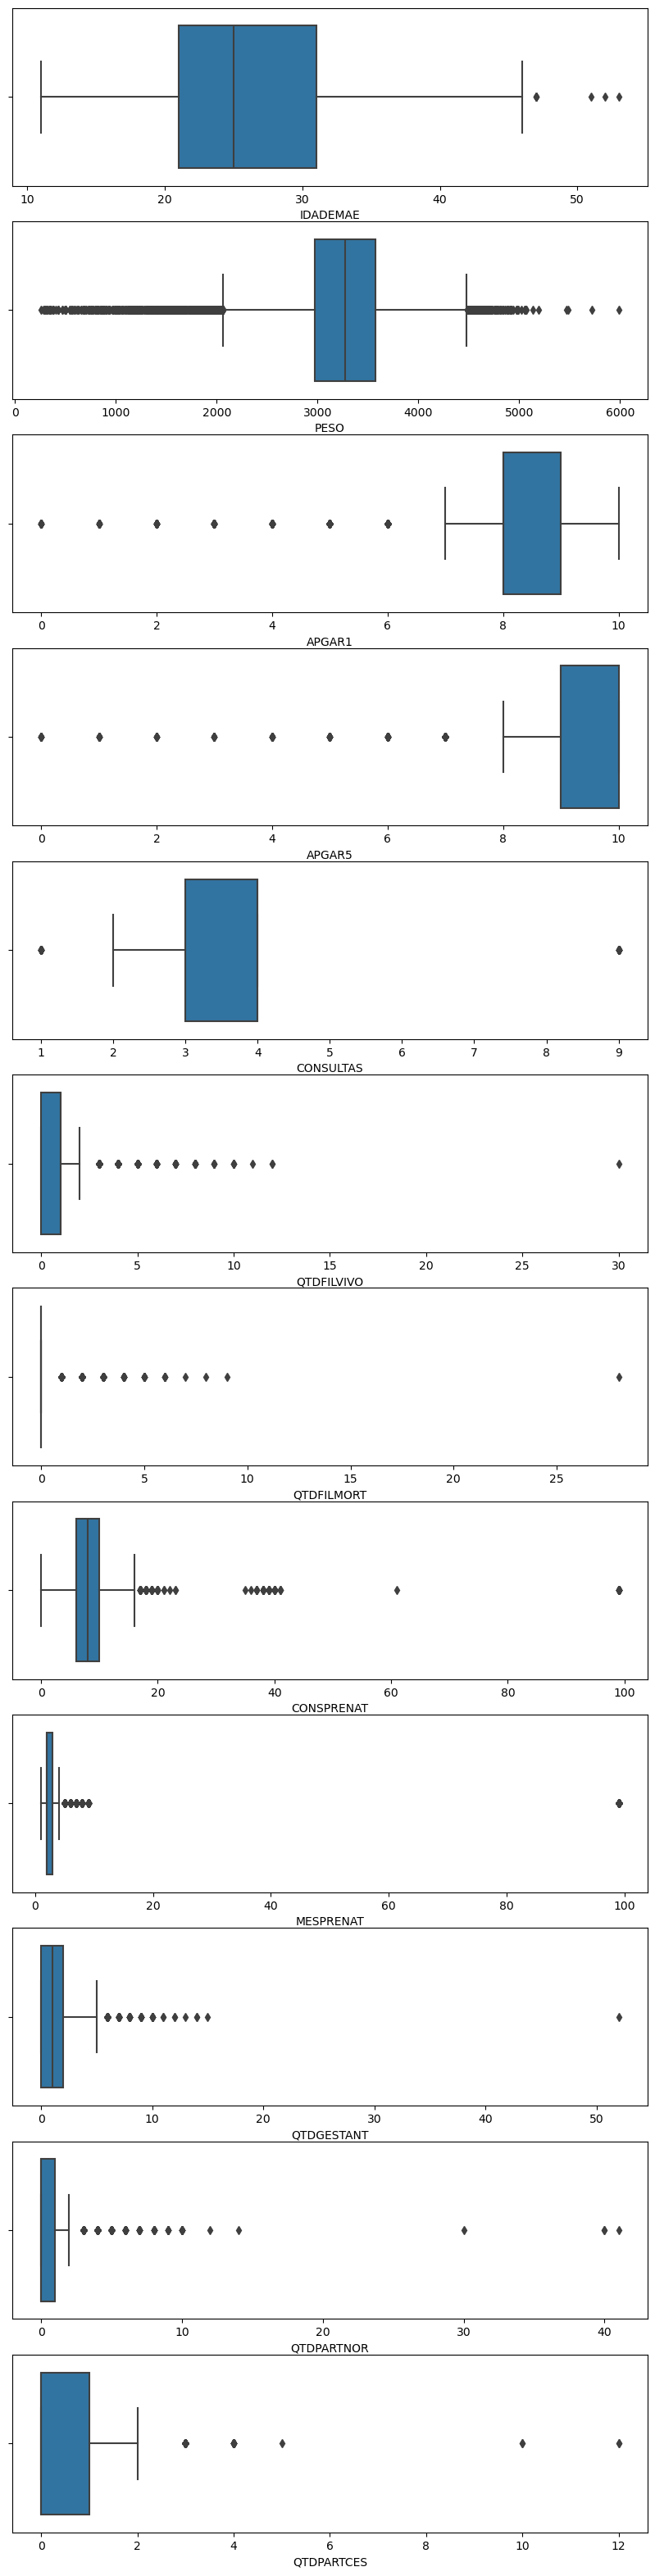

In [142]:
plt.close('all')
plt.rc('figure', figsize=(10, 40))
fig, axes = plt.subplots(12, 1)

sns.boxplot(ax=axes[0], x='IDADEMAE', data=df)
sns.boxplot(ax=axes[1], x='PESO', data=df)
sns.boxplot(ax=axes[2], x='APGAR1', data=df)
sns.boxplot(ax=axes[3], x='APGAR5', data=df)
sns.boxplot(ax=axes[4], x='CONSULTAS', data=df)

sns.boxplot(ax=axes[5], x='QTDFILVIVO', data=df)
sns.boxplot(ax=axes[6], x='QTDFILMORT', data=df)
sns.boxplot(ax=axes[7], x='CONSPRENAT', data=df)
sns.boxplot(ax=axes[8], x='MESPRENAT', data=df)
sns.boxplot(ax=axes[9], x='QTDGESTANT', data=df)

sns.boxplot(ax=axes[10], x='QTDPARTNOR', data=df)
sns.boxplot(ax=axes[11], x='QTDPARTCES', data=df)

plt.show()

In [143]:
# QTDFILVIVO QTDFILMORT MESPRENAT

- `MESPRENAT`

O termo "mês prenatal" na gestação refere-se ao período de acompanhamento médico e cuidados de saúde que uma mulher grávida recebe antes do nascimento do bebê. A gestação humana geralmente dura cerca de 40 semanas, o que equivale aproximadamente a 9 meses solares (ou 10 meses lunares, se considerarmos meses de 4 semanas)

`ATENÇÃO:` Temos alguns **outliers** na coluna `MESPRENAT`

In [144]:
print(df.MESPRENAT.mean())
print(df.MESPRENAT.max())

7.2565346046358705
99.0


Preenchemos com valor médio

In [145]:
def MESPRENAT(valor):
    if valor >= 12:
        return 7

df['MESPRENAT'] = df['MESPRENAT'].apply(MESPRENAT)

In [146]:
print(df.MESPRENAT.mean())
print(df.MESPRENAT.max())

7.0
7.0


## Métricas

### Describe nas colunas

- Colunas categóricas

In [147]:
df.select_dtypes('category').describe().transpose()

,count,unique,top,freq
ESCMAE,24332,5,8 a 11 anos,14435
GESTACAO,24332,6,37 a 41 semanas,21462
GRAVIDEZ,24332,3,Única,23884
PARTO,24332,2,Cesáreo,16480
SEXO,24332,2,Masculino,12467
RACACOR,24332,5,Parda,18016
munResNome,24332,52,Porto Velho,6799
munResUf,24332,1,Rondônia,24332
DTNASC_DIA,24332,7,Segunda-feira,4042
DTNASC_MES,24332,12,Março,2202


- Colunas numéricas

In [148]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IDADEMAE,24332.0,26.014836,6.358127,11.00000,21.00000,25.00000,31.00000,53.00000
ESTCIVMAE,24332.0,2.549359,1.652048,1.00000,1.00000,2.00000,5.00000,9.00000
QTDFILVIVO,24332.0,1.036865,1.120351,0.00000,0.00000,1.00000,1.00000,30.00000
QTDFILMORT,24332.0,0.245027,0.594494,0.00000,0.00000,0.00000,0.00000,28.00000
QTDFILTOTAL,24332.0,2.036865,1.120351,1.00000,1.00000,2.00000,2.00000,31.00000
CONSULTAS,24332.0,3.674503,0.626634,1.00000,3.00000,4.00000,4.00000,9.00000
HORANASC,24332.0,1267.547551,571.913444,0.00000,907.00000,1227.50000,1711.00000,2359.00000
APGAR1,24332.0,8.136692,0.976384,0.00000,8.00000,8.00000,9.00000,10.00000
APGAR5,24332.0,9.181695,0.776905,0.00000,9.00000,9.00000,10.00000,10.00000
PESO,24332.0,3247.610801,538.633314,258.00000,2970.00000,3275.00000,3575.00000,5985.00000


### Matriz de correlação

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

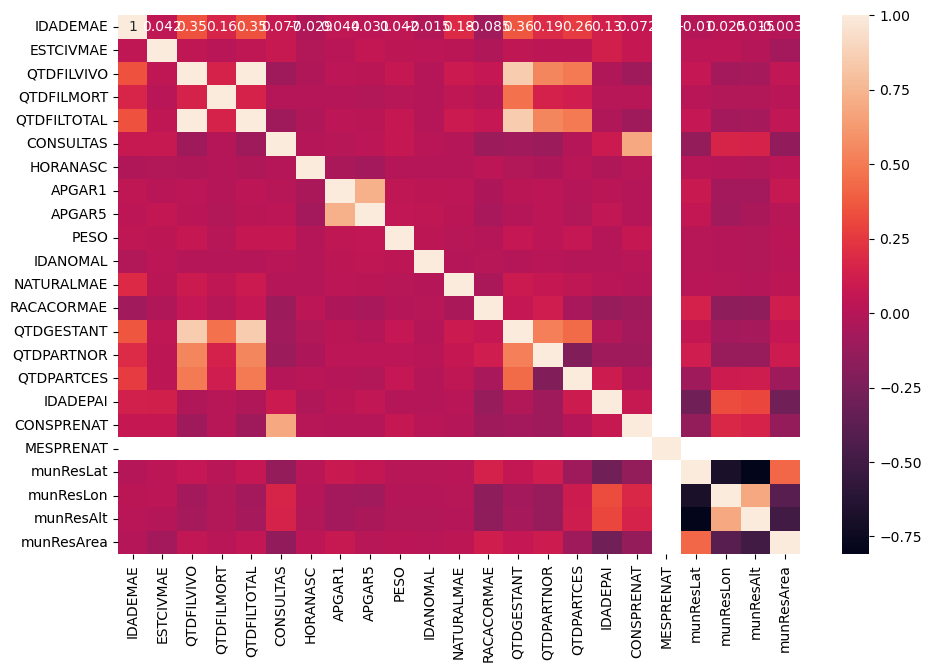

In [149]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(11, 7))
sns.heatmap(corr, annot=True)

# Insights

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/INSIGHTS.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.


---

## Como a análise será realizada:

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Untitled.jpg" alt="capa">

### **`Nossos objetivos`**

<ol type="1">
  <li>Descobrir os fatores que influenciam a saúde dos bebês</li>
  <li>Entender melhor as raças e o nível educacional das mães.</li>
  <li>Analisaremos as menores de idade, meninas que constroem família antes dos 18 anos.</li>
  <li>O que nos diz a escolha do parto entre cesariana ou parto vaginal?</li>
  <li>Descobrir os fatores que influenciam a saúde dos bebês</li>
  <li>E finalmente melhor compreender a população do estado de Rondônia no Brasil em 2019 e construir a um pouco do que seria o "Rosto" da população.</li>
</ol>

- Funções 

In [150]:
def line_graphic(list_dic, eixo_X, eixo_y, colors, names_line):
    fig = go.Figure()

    for dic, color, name_line in zip(list_dic, colors, names_line):
        fig.add_trace(go.Scatter(x=list(dic.keys()), y=list(dic.values()), mode='lines', name=name_line, line=dict(color=color)))
        fig.update_layout(plot_bgcolor="white", xaxis_title=eixo_y, yaxis_title=eixo_X)

    fig.show() # lightgrey turquoise # deepskyblue violet lightseagreen lightpink

In [151]:
def grafico_categoria(coluna:str, dataframe):
    coluna_dic = (dataframe[coluna].value_counts(normalize=True) * 100).round().to_dict()
    fig = px.bar(x=coluna_dic.values(), y=coluna_dic.keys(), title=f"Distribuição coluna: '{coluna}'") 
    fig.update_layout(plot_bgcolor="white", xaxis_title='Percentual %', yaxis_title='Categorias')
    fig.show()

In [152]:
def Grafico_de_Pizza(labels, values, marker_colors, legend_title_text, text):
    fig = go.Figure(data = go.Pie(labels = labels,
                                values = values,
                                marker_colors = marker_colors,
                                hole = 0.5,
                                pull = [0.15, 0.15, 0.15, 0.15]))
    #Rótulos
    fig.update_traces(textposition = "outside", textinfo = "percent+label")
    #Legenda
    fig.update_layout(legend_title_text = legend_title_text,
                    legend = (dict(orientation = "h",
                                xanchor = "auto",
                                x = 0.5)))
    #Texto
    fig.update_layout(annotations = [dict(text = text,
                                        x = 0.5,
                                        y = 0.5,
                                        font_size = 18,
                                        showarrow = False)])
    fig.show()

In [153]:
def distribuicao_coluna(coluna, categoria, dataframe):
    # Criar a tabela de contingência e calcular os percentuais
    contingency_table = pd.crosstab(dataframe[coluna], dataframe[categoria], normalize='index') * 100

    # Resetar o índice para transformar o DataFrame em formato "long" para plotly
    contingency_table = contingency_table.reset_index().melt(id_vars=coluna, value_name='Percentual')

    # Configurar o gráfico
    fig = px.bar(
        contingency_table, 
        x=coluna, 
        y='Percentual', 
        color=categoria, 
        barmode='group',
        labels={'Percentual': 'Percentuale (%)', 'ESCMAE': 'Cetegorie'},
        title=f'Distribuição {categoria} e {coluna}'
    )

    fig.update_layout(plot_bgcolor="white")

    # Mostrar o gráfico
    fig.show()

In [154]:
def line_bar(X, y1, y2, Titolo, name1, name2, Xname, Yname1, Yname2):
    fig = make_subplots(specs = [[{"secondary_y": True}]])

    fig.add_trace(go.Bar(x = X,
                        y = y1,
                        name = name1,
                        marker_color = "#32CD32"),
                secondary_y = False)

    fig.add_trace(go.Scatter(x = X,
                            y = y2,
                            name = name2,
                            mode = "lines",
                            line = dict(color = "crimson", 
                                    width = 4)),
                secondary_y = True)


    fig.update_xaxes(title_text = Xname)
    fig.update_yaxes(title_text = Yname1, secondary_y = False)
    fig.update_yaxes(title_text = Yname2, secondary_y = True)


    fig.update_layout(plot_bgcolor = "white",
                    yaxis2 = dict(range = [0,35]),
                    title=Titolo)
    fig.show()

## O rosto da sociedade

### Nascimentos no ano de 2019

In [155]:
nascimentos = df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([nascimentos], 'Quantidade', 'Datas', ['turquoise'], ['Nascimentos'])

#### Nascimentos por sexo do bebê

In [156]:
meninos = df[df['SEXO'] == 'Masculino'].groupby('DTNASC')['DTNASC'].count().to_dict()
meninas = df[df['SEXO'] == 'Feminino'].groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([meninos, meninas], 'Quantidade', 'Datas', ['deepskyblue', 'lightpink'], ['Meninos', 'Meninas'])

#### Média de nascimentos por dia

In [157]:
media_nascimentos = list(df.groupby('DTNASC')['DTNASC'].count().to_dict().values())
media_nascimentos = sum(media_nascimentos) / len(media_nascimentos)

print(f'Média de nascimentos por dia em Rondônia no ano de 2019 é de {round(media_nascimentos, 2)} bebês por dia')

Média de nascimentos por dia em Rondônia no ano de 2019 é de 66.66 bebês por dia


### Codições ​​sociorraciais dos bebês

In [158]:
racas = ['Parda','Branca','Preta','Indígena']
percentual = [74, 21, 3, 2]
cores_marcadores = ["khaki", "MediumSeaGreen", "tomato", "limegreen"]

Grafico_de_Pizza(racas, percentual, cores_marcadores, "Raça dos Bebês", "População")

#### Distribuição da escolaridade da mãe de acordo com o tom de pele do bebê

In [159]:
distribuicao_coluna('RACACOR', 'ESCMAE', df)

#### Sexo do bebê

In [160]:
distribuicao_coluna('RACACOR', 'SEXO', df)

#### Dia de cadastro

In [161]:
distribuicao_coluna('RACACOR', 'DTCADASTRO_DIA', df)

### Quantidade total de filhos

In [162]:
Grafico_de_Pizza(['Um filho','Dois filhos','Três filhos','4 filhos', 'Outros'], 
                 [34.98, 40.32, 16.59, 4.96, 3.13], 
                 ["khaki", "MediumSeaGreen", "tomato", "limegreen", 'grey'], 
                 "Faixas", "Total de Filhos")

#### Média da quantidade total de filhos vivos Vs Raça do bebê

In [163]:
QTDFILTOTAL = df.groupby('RACACOR')['QTDFILTOTAL'].mean().sort_values(ascending=False).to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILTOTAL.keys()), y=list(QTDFILTOTAL.values()), mode='lines+markers', name='', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Raça do bebê', yaxis_title='Média da quantidade total de filhos', title='Média da quantidade total de filhos vivos Vs Raça do bebê')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1578763822.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Média da quantidade total de filhos mortos Vs Raça do bebê

In [164]:
QTDFILMORT = df.groupby('RACACOR')['QTDFILMORT'].mean().sort_values(ascending=False).to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILMORT.keys()), y=list(QTDFILMORT.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Raça do bebê', yaxis_title='Média da quantidade total de filhos mortos', title='Média da quantidade total de filhos mortos Vs Raça do bebê')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\2706581781.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Média da quantidade total de filhos Vs Escolaridade da mãe

In [165]:
QTDFILTOTAL = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
QTDFILTOTAL = {chave: df.groupby('ESCMAE')['QTDFILTOTAL'].mean().to_dict()[chave] for chave in QTDFILTOTAL}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILTOTAL.keys()), y=list(QTDFILTOTAL.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Quantidade total de filhos', title='Média da quantidade total de filhos Vs Escolaridade da mãe')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1824968450.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Média da quantidade total de filhos mortos Vs Escolaridade da mãe

In [166]:
QTDFILMORT = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
QTDFILMORT = {chave: df.groupby('ESCMAE')['QTDFILMORT'].mean().to_dict()[chave] for chave in QTDFILMORT}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(QTDFILMORT.keys()), y=list(QTDFILMORT.values()), mode='lines+markers', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Média da quantidade total de filhos mortos', title='Média da quantidade total de filhos mortos Vs Escolaridade da mãe')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1807906641.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Comportamento da mãe de acordo com a idade

In [167]:
def splitter(idade:int):
    if (idade >= 10) & (idade <= 15): 
        return '10 à 15 anos'
    elif (idade >= 15) & (idade <= 20):
        return '15 à 20 anos'
    elif (idade >= 20) & (idade <= 25):
        return '20 à 25 anos'
    elif (idade >= 25) & (idade <= 30):
        return '25 à 30 anos'
    elif (idade >= 30) & (idade <= 35):
        return '30 à 35 anos'
    elif (idade >= 40) & (idade <= 45):
        return '40 à 45 anos'
    elif (idade >= 45) & (idade <= 50):
        return '45 à 50 anos'

In [168]:
df['faixa_mae'] = df['IDADEMAE'].apply(splitter)

PAIS = df[df['IDADEPAI'] != 0]
display(PAIS.head(5))
print(PAIS.shape)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,faixa_mae
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,NaN,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,15 à 20 anos
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,NaN,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,25 à 30 anos
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,NaN,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,None
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,NaN,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,NaN,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos


(7089, 41)


### Com base na raça e cor de pele

In [169]:
distribuicao_coluna('RACACOR', 'faixa_mae', df)

### Comparando a idade da mãe e do pai

In [170]:
PAIS['faixa_pai'] = PAIS['IDADEPAI'].apply(splitter)
PAIS['diferenca'] = abs(PAIS['IDADEMAE'] - PAIS['IDADEPAI'])

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\4211842173.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\4211842173.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Gráfico das idades

In [171]:
def grafico_faixas(minimo:int, maximo:int, X:str, hue:str):
    sns.displot(data = PAIS[(PAIS['IDADEMAE'] >= minimo) & (PAIS['IDADEMAE'] <= maximo)]
            ,x = X
            ,hue = hue
            ,bins = 10
            ,element = 'step'
            , kde = True
           )

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



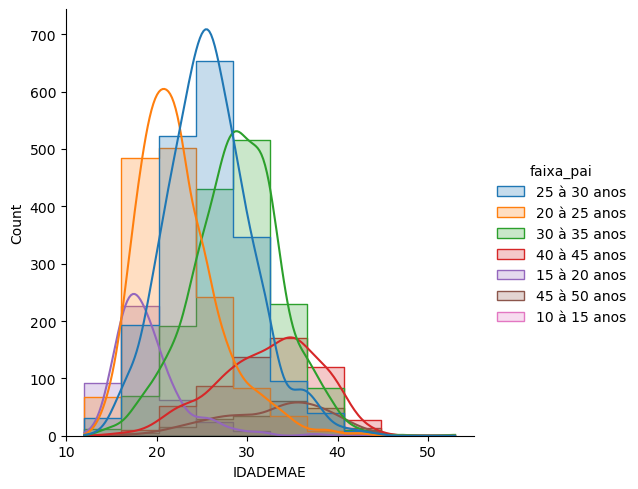

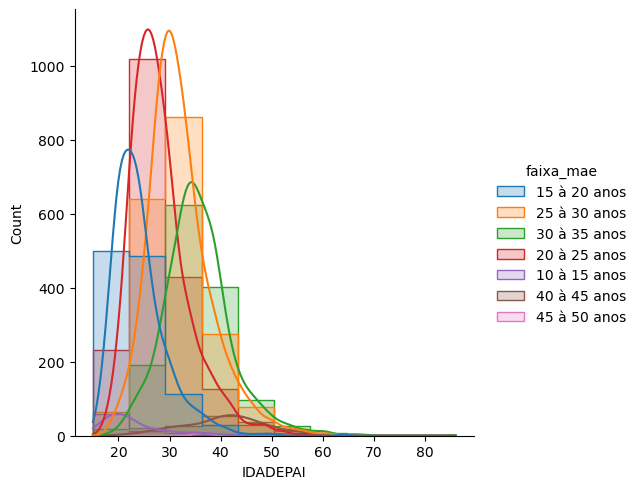

In [172]:
grafico_faixas(0, 80, 'IDADEMAE', 'faixa_pai')
grafico_faixas(0, 80, 'IDADEPAI', 'faixa_mae')

#### Pirâmide das idades

In [173]:
faixas = np.array(['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos', '30 à 35 anos', '40 à 45 anos', '45 à 50 anos'])

In [174]:
pais = {chave: PAIS.groupby('faixa_pai')['faixa_pai'].count().to_dict()[chave] for chave in faixas}
maes = {chave: PAIS.groupby('faixa_mae')['faixa_mae'].count().to_dict()[chave] for chave in faixas}

pais = np.array(list(pais.values()))
maes = np.array(list(maes.values()))

In [175]:
piramide = go.Figure()

piramide.add_trace(go.Bar(x = pais,
                         y = faixas,
                         orientation = "h",
                         name = "Pais",
                         marker = dict(color = "#32CD32")))

piramide.add_trace(go.Bar(x = -maes,
                         y = faixas,
                         orientation = "h",
                         name = "Mães",
                         marker = dict(color = "#E65CD9")))

piramide.update_layout(barmode = "overlay",
                      title = "Pirâmide das idades",
                      xaxis = dict(tickvals = [-2000, 0, 2000],
                                  title = "mil"),
                      plot_bgcolor = "white")

piramide.show()

#### Diferença média baseada na idade média da mãe

In [176]:
faixa_mae_media = ['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos',
                   '30 à 35 anos', '40 à 45 anos', '45 à 50 anos']
faixa_mae_media = {chave: PAIS.groupby('faixa_mae')['diferenca'].mean().to_dict()[chave] for chave in faixa_mae_media}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(faixa_mae_media.keys()), y=list(faixa_mae_media.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Idade média da mãe', yaxis_title='Diferença média de idade entre ela e o marido')

fig.show()

#### Escolaridade da mãe Vs diferença de idade entre ela e o marido:

In [177]:
ESCMAE = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
ESCMAE = {chave: PAIS.groupby('ESCMAE')['diferenca'].mean().to_dict()[chave] for chave in ESCMAE}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ESCMAE.keys()), y=list(ESCMAE.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Diferença de idade entre ela e o marido')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\4130552925.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Menores de idade

No início desta análise, decidimos não excluir a coluna na qual contém a idade do pai, apesar de ser `71% composta por dados nulos`. Então, agora chegou a hora de usar os `29% que nos resta`, faremos isso através de um algoritmo de `Machine Learning para preencher os dados nulos`.

Mães antes entre `15 à 20 anos` são a 3° fiaxa de idade do data frame

#### Primeiro, tentamos encontrar algumas métricas com os dados que temos

In [178]:
total = PAIS[PAIS['IDADEMAE'] <= 18]
menores = PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)]

print(f'{total.shape[0]} mães tiveram filhos antes dos 18 anos. {round((total.shape[0] / PAIS.shape[0] * 100), 2)}% do total')
print(f'Dessas, {menores.shape[0]} tiveram filhos antes dos 18 anos com pais maiores que 18 anos ou seja {round((menores.shape[0] / total.shape[0] * 100), 2)}%')

627 mães tiveram filhos antes dos 18 anos. 8.84% do total
Dessas, 542 tiveram filhos antes dos 18 anos com pais maiores que 18 anos ou seja 86.44%


#### Percentual

In [179]:
faixas = ['Mãe maior de idade','Mãe menor de idade com marido maior com + de 18 anos', 'Mãe e Pai menores de idade']
valores = [23705, 542, 85]
cores_marcadores = ["khaki", "MediumSeaGreen", "tomato"]

Grafico_de_Pizza(faixas, valores, cores_marcadores, "Raça dos Bebês", "População")

#### Idade média da mãe e do pai & Média da diferença

In [180]:
mdidmae = PAIS['IDADEMAE'].mean()
mdidpai = PAIS['IDADEPAI'].mean()
mddf = PAIS['diferenca'].mean()
print(f'Média idade mãe: {round(mdidmae, 2)}, Média idade pai: {round(mdidpai, 2)}, Média da diferença: {round(mddf, 2)}')

Média idade mãe: 26.93, Média idade pai: 31.03, Média da diferença: 5.5


#### Idade média da mãe e do pai & Média da diferença (Entre as mães menores de idade)

In [181]:
mdidmae = menores['IDADEMAE'].mean()
mdidpai = menores['IDADEPAI'].mean()
mddf = menores['diferenca'].mean()
print(f'Média idade mãe: {round(mdidmae, 2)}, Média idade pai: {round(mdidpai, 2)}, Média da diferença: {round(mddf, 2)}')

Média idade mãe: 16.9, Média idade pai: 23.96, Média da diferença: 7.06


#### Mães antes dos 18 - Quantidade de Registros e Diferença média de idade entre a mãe e o pai

In [182]:
qtd = menores.groupby('IDADEMAE')['diferenca'].count().round().to_dict()
media = menores.groupby('IDADEMAE')['diferenca'].mean().round().to_dict()
idades = [str(numero) for numero in qtd.keys()]

quantidade_registros = list(qtd.values())
media = list(media.values())

In [183]:
line_bar(idades, quantidade_registros, media,
         'Mães antes dos 18 - Quantidade de Registros e Diferença média de idade entre a mãe e o pai', 
         "Quantidade de Registros", "Diferença média de idade", "Idade da Mãe", "Quantidade", "Diferença")

#### Comparação da idade do pai maior de idade e com mãe menor de idade

In [184]:
qtd = menores.groupby('IDADEPAI')['diferenca'].count().round().to_dict()
media = menores.groupby('IDADEPAI')['diferenca'].mean().round().to_dict()
idades = [str(numero) for numero in qtd.keys()]

quantidade_registros = list(qtd.values())
media = list(media.values())

In [185]:
line_bar(idades, quantidade_registros, media,
         'Comparação da idade do pai maior de idade e com mãe menor de idade', 
         "Quantidade de Registros", "Diferença média de idade", "Idade do Pai", "Quantidade", "Diferença")

#### Diferença média de idade entre mãe e pai por raça

In [186]:
RACA = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA = {chave: PAIS.groupby('RACACOR')['diferenca'].mean().sort_values(ascending=False).to_dict()[chave] for chave in RACA}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(RACA.keys()), y=list(RACA.values()), mode='lines+markers', line=dict(color='turquoise'), name='APGAR1'))
fig.update_layout(plot_bgcolor="white", xaxis_title='', yaxis_title='Percentual %', title='Diferença média de idade entre mãe e pai por raça')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\2987947099.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Diferença média de idade entre mãe e pai por raça, entre as que tiveram bebê antes dos 18 anos

In [187]:
RACA = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA = {chave: menores.groupby('RACACOR')['diferenca'].mean().sort_values(ascending=False).to_dict()[chave] for chave in RACA}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(RACA.keys()), y=list(RACA.values()), mode='lines+markers', line=dict(color='turquoise'), name='APGAR1'))
fig.update_layout(plot_bgcolor="white", xaxis_title='', yaxis_title='Percentual %', title='Diferença média de idade entre mãe e pai por raça')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1588830003.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Mãe antes dos 18 - Grupos de idade

In [188]:
menores['idades'] = menores['IDADEMAE'].astype(str) + ' Mãe - ' + menores['IDADEPAI'].astype(str) + ' Pai'

unique_idades = set(menores['idades'].to_list())

count_dict = {}

for idades in unique_idades:
    count_dict[idades] = menores['idades'].tolist().count(idades)

count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True)[:18])

fig = px.bar(x=count_dict.values(), y=count_dict.keys(), title=f"") 
fig.update_layout(plot_bgcolor="white", xaxis_title='Quantidade', yaxis_title='Idades')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\247210611.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Machine Learning

In [223]:
"""mlm = MLM()
mlm.Machine_Learning(df)
predictions = pd.read_csv('predictions.csv')
Sinasc = df.copy()"""

"mlm = MLM()\nmlm.Machine_Learning(df)\npredictions = pd.read_csv('predictions.csv')\nSinasc = df.copy()"

In [224]:
"""Sinasc['Predictions'] = predictions['Target']
predictions = list(round(Sinasc['Predictions'].value_counts(normalize=True) * 100, 2).to_dict().values())

print(f'{predictions[0]}% & {predictions[1]}%')"""

"Sinasc['Predictions'] = predictions['Target']\npredictions = list(round(Sinasc['Predictions'].value_counts(normalize=True) * 100, 2).to_dict().values())\n\nprint(f'{predictions[0]}% & {predictions[1]}%')"

## A escolha do tipo de parto | Cesáreo ou Vaginal? E porque?

In [190]:
cesareo_df = df[df['PARTO'] == 'Cesáreo']
vaginal_df = df[df['PARTO'] == 'Vaginal']

#### Nascimentos por tipo de parto

In [191]:
percentual_parto = round((df['PARTO'].value_counts(normalize=True) * 100), 2).to_dict()
Vaginal_perc = percentual_parto['Vaginal']
Cesareo_perc = percentual_parto['Cesáreo']

print(f'Dos partos de 2019 {Cesareo_perc}% foram Cesáreo e {Vaginal_perc}% foram Vaginal')

Dos partos de 2019 67.73% foram Cesáreo e 32.27% foram Vaginal


In [192]:
cesareo = cesareo_df.groupby('DTNASC')['DTNASC'].count().to_dict()
vaginal = vaginal_df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([cesareo, vaginal], 'Quantidade', 'Datas', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

### Escolaridade da Mãe

In [193]:
distribuicao_coluna('ESCMAE', 'PARTO', df)

### Com base na idade da mãe

In [194]:
unique_ages = df['IDADEMAE'].unique().tolist()
unique_ages.sort()

dicionario_cesareo = {}
dicionario_vaginal = {}

In [195]:
for x in unique_ages:
    total_Cesareo, _ = df[(df['IDADEMAE'] == x) & (df['PARTO'] == 'Cesáreo')].shape
    total_Vaginal, _ = df[(df['IDADEMAE'] == x) & (df['PARTO'] == 'Vaginal')].shape

    dicionario_cesareo[x] = total_Cesareo
    dicionario_vaginal[x] = total_Vaginal

line_graphic([dicionario_cesareo, dicionario_vaginal], 'Quantidade', 'Idade da mãe', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

### Com base na quantidade total de filhos

In [196]:
media = df.groupby('PARTO')['QTDFILTOTAL'].mean().to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(media.keys()), y=list(media.values()), mode='lines+markers', line=dict(color='turquoise')))
fig.update_layout(plot_bgcolor="white", xaxis_title='Parto', yaxis_title='Média', title='Média da quantidade total de filhos por parto')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\3991252051.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Com base na raça e cor da pele do bebê

In [197]:
distribuicao_coluna('RACACOR', 'PARTO', df)

## Saúde das crianças nascidas

### APGAR5 & APGAR1

In [198]:
def APGAR(valor):
    if valor <= 5:
        return 'Baixo'
    elif (valor >= 6) & (valor <= 8):
        return 'Médio'
    else:
        return 'Alto'

In [199]:
df['APGAR5_status'] = df['APGAR5'].apply(APGAR)
df['APGAR1_status'] = df['APGAR1'].apply(APGAR)

In [200]:
cores_marcadores = ["khaki", "MediumSeaGreen", "tomato"]
apgar_status = ['Alto','Médio','Baixo']

Grafico_de_Pizza(apgar_status, [33.69, 64.11, 2.2], cores_marcadores, "Status do APGAR", "APGAR1")
Grafico_de_Pizza(apgar_status, [91.07, 8.44, 0.49], cores_marcadores, "Status do APGAR", "APGAR5")

#### Status do APGAR5 por faixa de idade da mãe

In [201]:
distribuicao_coluna('faixa_mae', 'APGAR5_status', df)

#### Média do APGAR por raça

In [202]:
ORDEM  = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA_APGAR1 = {chave: df.groupby('RACACOR')['APGAR1'].mean().sort_values(ascending=False).to_dict()[chave] for chave in ORDEM}
RACA_APGAR5 = {chave: df.groupby('RACACOR')['APGAR5'].mean().sort_values(ascending=False).to_dict()[chave] for chave in ORDEM}

line_graphic([RACA_APGAR1, RACA_APGAR5], 'Média do APGAR', 'Raça do Bebê', ['turquoise', 'lightgrey'], ['APGAR1', 'APGAR5'])

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\3261517461.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\3261517461.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Entres as menores de idade

In [203]:
ORDEM  = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA_APGAR1 = {chave: menores.groupby('RACACOR')['APGAR1'].mean().sort_values(ascending=False).to_dict()[chave] for chave in ORDEM}
RACA_APGAR5 = {chave: menores.groupby('RACACOR')['APGAR5'].mean().sort_values(ascending=False).to_dict()[chave] for chave in ORDEM}

line_graphic([RACA_APGAR1, RACA_APGAR5], 'Média do APGAR', 'Raça do Bebê', ['turquoise', 'lightgrey'], ['APGAR1', 'APGAR5'])

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\266844090.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\266844090.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Peso dos bebês

#### Média do peso por raça

In [204]:
RACA = ['Indígena', 'Parda', 'Branca', 'Preta', 'Amarela']
RACA = {chave: df.groupby('RACACOR')['PESO'].mean().sort_values(ascending=False).to_dict()[chave] for chave in RACA}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(RACA.keys()), y=list(RACA.values()), mode='lines+markers', line=dict(color='turquoise'), name=''))
fig.update_layout(plot_bgcolor="white", xaxis_title='Raça do bebê', yaxis_title='Média do peso', title='Média do peso por raça')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1979105742.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Média do peso por idade da mãe

In [205]:
ORDEM  = ['10 à 15 anos', '15 à 20 anos', '25 à 30 anos', '30 à 35 anos']
PESO = {chave: df.groupby('faixa_mae')['PESO'].mean().sort_values(ascending=False).to_dict()[chave] for chave in ORDEM}

line_graphic([PESO], 'Média do Peso', 'Idade da Mãe', ['turquoise'], ['Peso'])

### Tempo de gestação

#### Média do peso por tempo de gestação

In [206]:
GESTACAO = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
GESTACAO = {chave: df.groupby('GESTACAO')['PESO'].mean().sort_values(ascending=False).to_dict()[chave] for chave in GESTACAO}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(GESTACAO.keys()), y=list(GESTACAO.values()), mode='lines+markers', line=dict(color='turquoise'), name=''))
fig.update_layout(plot_bgcolor="white", xaxis_title='Tempo de gestação', yaxis_title='Média do peso', title='Média do peso pelo tempo de gestação')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\616655641.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Média do APGAR1 & APGAR5 por tempo de gestação

##### APGAR1

In [207]:
GESTACAO = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
GESTACAO = {chave: df.groupby('GESTACAO')['APGAR1'].mean().sort_values(ascending=False).to_dict()[chave] for chave in GESTACAO}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(GESTACAO.keys()), y=list(GESTACAO.values()), mode='lines+markers', line=dict(color='turquoise'), name=''))
fig.update_layout(plot_bgcolor="white", xaxis_title='Tempo de gestação', yaxis_title='Média do APGAR1', title='Média do APGAR1 por tempo de gestação')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\3998386374.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



##### APGAR5

In [208]:
GESTACAO = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
GESTACAO = {chave: df.groupby('GESTACAO')['APGAR5'].mean().sort_values(ascending=False).to_dict()[chave] for chave in GESTACAO}

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(GESTACAO.keys()), y=list(GESTACAO.values()), mode='lines+markers', line=dict(color='turquoise'), name=''))
fig.update_layout(plot_bgcolor="white", xaxis_title='Tempo de gestação', yaxis_title='Média do APGAR5', title='Média do APGAR5 por tempo de gestação')
fig.show()

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_11068\1993352113.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Com base na raça e cor de pele

In [209]:
distribuicao_coluna('RACACOR', 'GESTACAO', df)

#### Com base na idade da mãe

In [210]:
distribuicao_coluna('faixa_mae', 'GESTACAO', df)

## Conclusão: O que aprendemos com nossa análise?

As conclusões que essa análise nos traz são:



<p align="center">
  <img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/1.jpg" alt="capa" width="100">
</p>

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>